In [1]:
!pip install sklearn

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.models import load_model


from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.preprocessing import sequence

import time
import html
from nltk.tokenize import WordPunctTokenizer
import re

np.random.seed(0)

%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the re

from keras.preprocessing import sequence
Keras has provide very nice text processing functions.

Then we can format our text samples and labels into tensors that can be fed into a neural network. To do this, we will rely on Keras utilities keras.preprocessing.text.Tokenizer and keras.preprocessing.sequence.pad_sequences.

In [3]:
clean_data = pd.read_csv("clean_sentences.csv")

In [4]:
# Converting the above data to a dataframe
df = pd.DataFrame(clean_data)

In [5]:
# Checking the shape of the dataframe
df.shape

(1600000, 2)

In [6]:
# looking into the columns of the dataframe
df.columns

Index(['Sentences', 'Label'], dtype='object')

In [7]:
# Checking if there is any null values
np.sum(df.isnull().any(axis=1))

3373

In [8]:
# Checking all the rows in the null values
df[df.isnull().any(axis=1)].head()

,Sentences,Label
208,NaN,0
249,NaN,0
398,NaN,0
430,NaN,0
1011,NaN,0


In [9]:
# Dropping all the null values
df = df.dropna()

In [10]:
# Checking the shape after dropping the null values
df.shape

(1596627, 2)

In [11]:
# Rechecking if there is anymore null values
np.sum(df.isnull().any(axis=1))

0

In [12]:
# Checking if we have equal no of positive and negative sentences
df["Label"].value_counts()

0    798467
1    798160
Name: Label, dtype: int64

In [13]:
df.head()

,Sentences,Label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [14]:
df["Sentences"][1]

'is upset that he can not update his facebook by texting it and might cry as result school today also blah'

In [15]:
df["Label"].value_counts()

0    798467
1    798160
Name: Label, dtype: int64

In [16]:
# Assigning the features and target values to X and y
X = df["Sentences"]
y = df["Label"]

In [17]:
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(1596627,)
(1596627,)


In [18]:
print("no. of classes :")
print(np.unique(y))

no. of classes :
[0 1]


In [19]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
1519745


Sentence length: 
Mean 60.23 words (32.842545)


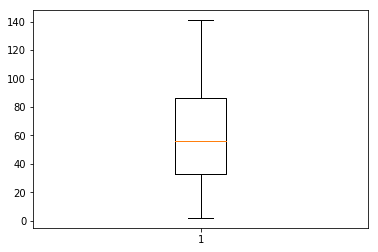

In [20]:
# Summarize sentence length
print("Sentence length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [21]:
# Train, Test and Validation split
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y, test_size=.02, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=42)

In [22]:
# looking into the shape of the data after the data split

In [23]:
x_train.shape

(1564694,)

In [24]:
X.shape[0] - x_train.shape[0]

31933

In [25]:
x_validation_and_test.shape

(31933,)

In [26]:
x_validation.shape

(15966,)

In [27]:
x_test.shape

(15967,)

In [28]:
# TFIDF
tvec1 = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
tvec1.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [29]:
# feature_names = tfidf.get_feature_names()
# for col in response.nonzero()[1]:
#     print feature_names[col], ' - ', response[0, col]

In [30]:
# Trasforming to vectors
x_train_tfidf = tvec1.transform(x_train)

In [31]:
x_train_tfidf

<1564694x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 29876579 stored elements in Compressed Sparse Row format>

In [32]:
# Trasforming to vectors and converting them to an array
x_validation_tfidf = tvec1.transform(x_validation).toarray()


In [33]:
x_validation_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Logistic Regression

In [52]:
%%time
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)

CPU times: user 53.4 s, sys: 48 ms, total: 53.5 s
Wall time: 53.5 s


In [53]:
lr.score(x_train_tfidf, y_train)

0.8419882737455374

In [54]:
lr.score(x_validation_tfidf, y_validation)

0.8207440811724915

## Random Forest

In [39]:
%%time
print("Training the random forest...")

# Initialize a Random Forest classifier with 100 trees

# forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=2, min_samples_split=10,
#             min_weight_fraction_leaf=0.0, n_jobs=1,
#             random_state=42, verbose=0, warm_start=False, max_depth = 10,
#             n_estimators = 200)


# forest = RandomForestClassifier(n_estimators = 100) 

forest = RandomForestClassifier(n_estimators = 10, oob_score=True, random_state=1, verbose=1) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( x_train_tfidf, y_train )

Training the random forest...


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 75.1min finished


CPU times: user 1h 15min 28s, sys: 1.14 s, total: 1h 15min 29s
Wall time: 1h 15min 29s


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [40]:
forest.score(x_train_tfidf, y_train)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   37.6s finished


0.9826585901141054

In [41]:
forest.score(x_validation_tfidf, y_validation)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


0.7747713892020544

## GradientBoost

In [42]:
%%time
Gb = GradientBoostingClassifier(n_estimators = 100, verbose=1)
Gb = Gb.fit( x_train_tfidf, y_train )

      Iter       Train Loss   Remaining Time 
         1           1.3734           25.82m
         2           1.3628           24.41m
         3           1.3540           23.91m
         4           1.3463           23.48m
         5           1.3397           23.15m
         6           1.3338           22.78m
         7           1.3281           22.46m
         8           1.3232           22.17m
         9           1.3189           21.93m
        10           1.3147           21.65m
        20           1.2806           19.39m
        30           1.2566           16.93m
        40           1.2381           14.51m
        50           1.2233           12.09m
        60           1.2108            9.68m
        70           1.1992            7.26m
        80           1.1892            4.84m
        90           1.1807            2.42m
       100           1.1727            0.00s
CPU times: user 24min 10s, sys: 1.28 s, total: 24min 12s
Wall time: 24min 11s


In [43]:
Gb.score( x_train_tfidf, y_train )

0.7068429993340551

In [44]:
Gb.score(x_validation_tfidf, y_validation)

0.7005511712388827

## Naive Bayes Model

In [45]:
%%time
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)


CPU times: user 460 ms, sys: 0 ns, total: 460 ms
Wall time: 461 ms


In [46]:
nb.score(x_train_tfidf, y_train)

0.8105782983765516

In [47]:
nb.score(x_validation_tfidf, y_validation)

0.8018915194788927

## Testing the data

In [55]:
# I am using the test data to test
test_data_features = tvec1.transform(x_test)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = lr.predict(test_data_features)



In [56]:
result

array([1, 1, 1, ..., 0, 1, 1])

In [57]:
df = pd.DataFrame()
df["Sentences"] = x_test
df["Real_y_values"] = y_test
df["Predictions"] = result

In [59]:
df

,Sentences,Real_y_values,Predictions
1435744,well if you ever need ny tix we sell tix natio...,1,1
1254910,whoohoo it going down you gotta check out it c...,1,1
1510247,are you in seattle tomorrow if so let me know ...,1,1
1395796,jade love the new photo gorgeous xxx,1,1
969040,had the mother of all hangovers today super ev...,1,1
824449,shall go and shower now and then go and pick t...,1,1
1429481,wrong seb but thanks none the less,1,1
598043,missin my baby,0,0
465417,oh really that dissapointing,0,0
1425459,soon soon sure we ll get em,1,1
